# COMPARITIVE STUDY FOR DRIVER'S DROWSINESS DETECTION 

DROWSINESS_DETECTION_WITH_CNN_USING_KERAS_TRAIN

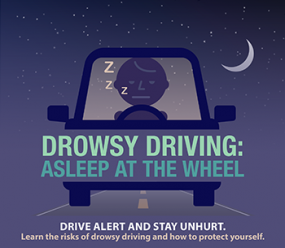

### Aim:
    Our project aims at providing a solution for sleepness dtection while driver is on the wheel. As we know, sleeping while driving is very dangerous not only for the driver, but also for others. Neumerous accident cases have been reported due to the driver falling asleep while driving for maybe even a second. 

### Project flow:
    We have implemented our project using:
        1. CNN model using np array's. 
        2. CNN model using keras. 
        3. VGG 16 model using keras. 
    Our project contains 3 ipynb files: 
        1. CNN file using np array's from scratch.
        2. CNN model using keras
            2a. CNN code for training data
            2b. CNN code for the testing data 
        3.  VGG 16 model 
            3a. VGG16 code code for training data
            3b. VGG16 code code for testing data

## This file contains the code that will help us to TRAIN our CNN model  using keras 

### Importing Packages

In [1]:

import numpy as np #used to perform opertaions on arrays 
import pandas as pd #used for data analysis and associated manipulation of tabular data in Dataframes
import os #helps in providing functions to import with the oeprating system
import cv2 
import matplotlib.pyplot as plot #helps in creating vizualizations in python
import keras
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
#from pygame import mixer
import time

In [2]:
# The use of this function is to read all the images and plot them.
def image_plot(path, top=10):
    item_directories = os.listdir(path) #fetched the path
    item_files = [os.path.join(path, record) for record in item_directories][:5] #reading each item from the folder
  
    plot.figure(figsize=(20, 20)) #defining the figure size 
  
    for var_1, image_path in enumerate(item_files):
        plot.subplot(10, 10, var_1+1)
        image = plot.imread(image_path)
        plot.tight_layout()         
        plot.imshow(image, cmap='gray')  #running htrough a loop and plotting each image 


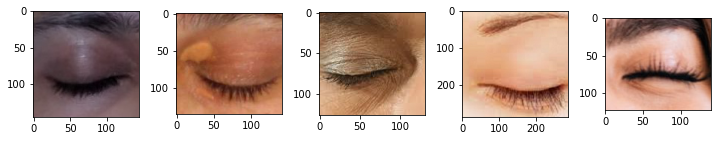

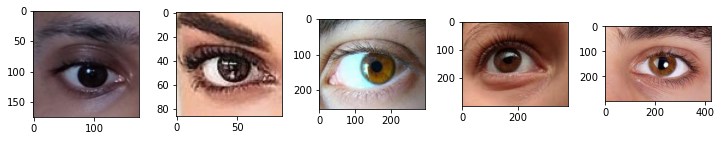

In [3]:
# calling the above function and vizualizing sample images
data_loc = 'dataset/dataset_eye/train'
folder_loc = ['/Closed', '/Open']
for var_2 in folder_loc:
    image_plot(data_loc+var_2)

### Preprocessing the data 

In [4]:
batch_size = 128 #setting a batch size so that images will be divided accorinf to the batch size
trn_data_split = ImageDataGenerator(horizontal_flip = True, 
                                  rescale = 1./255, 
                                  zoom_range = 0.2, 
                                  validation_split = 0.1) #Taking the train dataset, preprocessing it by, rescaling, zooming and flipping the data. 
tst_data_split = ImageDataGenerator(rescale = 1./255) #Taking the test dataset and preprocessing it.

In [5]:
train_data_loc = 'dataset/dataset_eye/train' #location where we have to get the train data from
test_data_loc = 'dataset/dataset_eye/test' #location where we have to get the test data from

print("The total number of images along with the number of classes in the train dataset are:")
train_set = trn_data_split.flow_from_directory(train_data_loc, target_size = (256,256),
                                              batch_size = batch_size, 
                                              color_mode = 'grayscale',
                                              class_mode = 'categorical') #we convert it to grayscale since basic cnn accepts only grayscale image. 
print("The total number of images along with the number of classes in the train dataset are:")
test_set = tst_data_split.flow_from_directory(test_data_loc, target_size = (256,256),
                                              batch_size = batch_size, 
                                              color_mode = 'grayscale',
                                              class_mode = 'categorical') #we convert it to grayscale since basic cnn accepts only grayscale image.

The total number of images along with the number of classes in the train dataset are:
Found 1234 images belonging to 2 classes.
The total number of images along with the number of classes in the train dataset are:
Found 218 images belonging to 2 classes.


### Model implementation 

In [6]:

classes = 2 #Open eye and close eye are our two classes

#defining our model that has 1 input layer, 2 hidden layers, one fully connected layers and one output layer.
basic_cnn_model = Sequential()
basic_cnn_model.add(Conv2D(32, (3,3), padding = 'same', input_shape = (256,256,1), activation = 'relu'))
basic_cnn_model.add(MaxPooling2D(pool_size = (2,2)))

basic_cnn_model.add(Conv2D(64, (3,3), padding = 'same', activation = 'relu'))
basic_cnn_model.add(MaxPooling2D(pool_size = (2,2)))

basic_cnn_model.add(Conv2D(128,(3,3), padding='same', activation='relu'))
basic_cnn_model.add(MaxPooling2D(pool_size=(2,2))) 

basic_cnn_model.add(Flatten())

basic_cnn_model.add(Dense(64, activation = 'relu'))

basic_cnn_model.add(Dense(classes, activation = 'softmax'))

print(basic_cnn_model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 131072)            0

In [7]:
basic_cnn_model.compile(loss = 'categorical_crossentropy',optimizer = 'adam' , metrics = ['accuracy']) #compiling the model we built by using adam optimizer and calculating the accuracy of the model
model_path="cnn_keras_drowsiness.h5" #path to save the model we have created so that we can use it while testing the model

item_check = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, 
                              save_best_only=True, mode='max') #Saves the best model from all the epochs we have run

callbacks_list = [item_check]


### Running epochs 

In [8]:
epoch_number = 10 # setting the number of epochs 
trn_stps=train_set.n//train_set.batch_size
tst_stps =test_set.n//test_set.batch_size

In [9]:
print("Steps taken for the train data\n",trn_stps)
print("Steps taken for the test data\n",tst_stps)

Steps taken for the train data
 9
Steps taken for the test data
 1


In [10]:
history = basic_cnn_model.fit_generator(train_set, epochs=epoch_number, steps_per_epoch=trn_stps,validation_data=test_set,
                    validation_steps=tst_stps, callbacks = callbacks_list) #fitting the model and running the dataset accoridng to our epoch value, and calculating the loss and accuracy.


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
9/9 [==============================] - ETA: 0s - loss: 0.9697 - accuracy: 0.4937
Epoch 00001: val_accuracy improved from -inf to 0.46094, saving model to cnn_keras_drowsiness.h5
9/9 [==============================] - 89s 10s/step - loss: 0.9697 - accuracy: 0.4937 - val_loss: 0.6875 - val_accuracy: 0.4609
Epoch 2/10
9/9 [==============================] - ETA: 0s - loss: 0.6377 - accuracy: 0.6718
Epoch 00002: val_accuracy improved from 0.46094 to 0.86719, saving model to cnn_keras_drowsiness.h5
9/9 [==============================] - 82s 9s/step - loss: 0.6377 - accuracy: 0.6718 - val_loss: 0.4887 - val_accuracy: 0.8672
Epoch 3/10
9/9 [==============================] - ETA: 0s - loss: 0.3937 - accuracy: 0.8436
Epoch 00003: val_accuracy improved from 0.86719 to 0.87500, saving model to cnn_keras_drowsiness.h5
9/9 [==============================] - 83s 9s/step - loss: 0.3937 - accuracy: 0.8436 - val_loss:

### Vizualizing the loss and accuracy for our train and test set

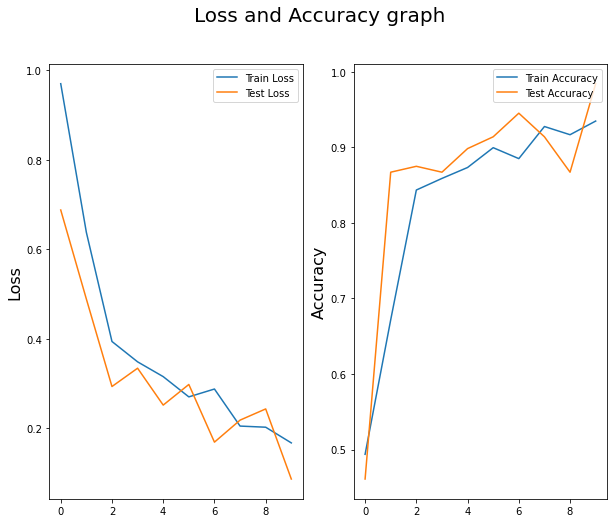

In [11]:
plot.figure(figsize=(10,8))
plot.subplot(1, 2, 1)
plot.suptitle('Loss and Accuracy graph', fontsize=20)
plot.ylabel('Loss', fontsize=16)
plot.plot(history.history['loss'], label='Train Loss')
plot.plot(history.history['val_loss'], label='Test Loss')
plot.legend(loc='upper right')

plot.subplot(1, 2, 2)
plot.ylabel('Accuracy', fontsize=16)
plot.plot(history.history['accuracy'], label='Train Accuracy')
plot.plot(history.history['val_accuracy'], label='Test Accuracy')
plot.legend(loc='upper right')
plot.show()

# Analysis of the Model (Accuracy_score,Classification_report,Confusion Matrix)

In [12]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
actual = []
predicted = []
basic_cnn_model = load_model('cnn_keras_drowsiness.h5')
for directory_name, _, files in os.walk('dataset/dataset_eye/test'):
    for file in files:
        img_loc = os.path.join(directory_name, file)
        classes = img_loc.split("\\")[-2]
        actual.append(classes)
        eye_capture = cv2.imread(img_loc)
        r_l_eye = cv2.cvtColor(eye_capture,cv2.COLOR_BGR2GRAY)
        eye_capture = cv2.resize(r_l_eye,(256,256))
        eye_capture= eye_capture/255
        eye_capture= eye_capture.reshape(256,256,-1)
        eye_capture = np.expand_dims(eye_capture,axis=0)
        predictions = basic_cnn_model.predict(eye_capture)
        class_labels=['Closed','Open']
        prediction_class_label = class_labels[predictions.argmax()]
        predicted.append(prediction_class_label)
print("****** report on test data Basic CNN********************************")
print(accuracy_score(actual,predicted))
print(confusion_matrix(actual,predicted))
print(classification_report(actual,predicted))

****** report on test data Basic CNN********************************
0.9587155963302753
[[106   3]
 [  6 103]]
              precision    recall  f1-score   support

      Closed       0.95      0.97      0.96       109
        Open       0.97      0.94      0.96       109

    accuracy                           0.96       218
   macro avg       0.96      0.96      0.96       218
weighted avg       0.96      0.96      0.96       218



### REFERENECES

1. https://www.kaggle.com/code/adinishad/driver-drowsiness-using-keras
2. https://data-flair.training/blogs/python-project-driver-drowsiness-detection-system/
3. https://en.wikipedia.org/wiki/Driver_drowsiness_detection
4. https://pyimagesearch.com/2017/05/08/drowsiness-detection-opencv/
5. https://www.analyticsvidhya.com/blog/2021/05/convolutional-neural-networks-cnn/
6. https://en.wikipedia.org/wiki/Convolutional_neural_network
7. https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53